# **Group Assignment - Team 2**
**Team:** Benjamin Jordan, Eduardo Navarrete, Kazutaka Yoshiyasu, Takatsuyo Ishida, Wenlin He, Yash Raipancholia  
**Professor:** Silvia Sentis Ariza  
**Course:** AI in Finance: Data-Driven Investment Strategies with Python  
**Due Date:** 11th July, 2024  
***Hult International Business School***

## **Introduction**
This assignment will analyse various datasets regaring factors that influence the housing prices in the United States, represented by the Home Price Index. The approach starts with data processing and cleaning, the analysis and understandment of the the variables in the dataset, and will end in developing models to forecast this Home Price Index and to help us decide if it is a good moment to buy or sell. The objective is to be able to accurately predict the movement of this index based on the analysed variables. This data can assist in generating better risk assessments and better management strategies in order to improve the financial outcome for stakeholders tracking this index.

In the context of real estate investment, we employ a RandomForest Regressor to predict the Home Price Index (HPI), a continuous variable, which facilitates forecasting market trends and pricing dynamics. Simultaneously, a RandomForest Classifier is utilized to make strategic decisions on whether to `Buy` or `Sell` properties based on the categorical outcome derived from the percentage change in HPI. The selection of Random Forest models is due to their robustness against overfitting, capability to handle complex and large datasets, and their effectiveness in elucidating the importance of various predictors. This dual-model approach not only enhances strategic investment decisions but also supports economic forecasting, optimizing the overall investment strategy in the real estate market.



# Factors Affecting USA National Home Prices Dataset

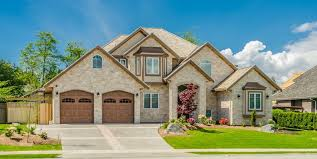

https://www.kaggle.com/datasets/madhurpant/factors-affecting-usa-national-home-prices?select=Mortgage.csv

**About the Dataset:** 

This dataset includes key indicators influencing housing prices in the United States. US Mortgage Rates track average mortgage interest rates, reflecting borrowing costs and their impact on the real estate market. Gross Domestic Product (GDP) measures the total value of goods and services produced, indicating economic health and growth trends. Unemployment Rates show the percentage of the labor force actively seeking employment, highlighting labor market health and economic stability.

The FED Funds Rate, the overnight lending rate between depository institutions, influences borrowing costs and economic activity, Population Growth, accounting for births, deaths, and migration, provides insights into demographic trends affecting the labor force and consumer markets. The Consumer Price Index (CPI) measures average changes in prices paid by urban consumers for goods and services, serving as a key indicator of inflation or deflation and influencing consumer spending and economic policies.

The S&P Case-Shiller Housing Price Index tracks changes in residential real estate prices, offering insights into the health and trends of the housing market, including property values and their broader economic impact.

In [223]:
# Import libraries
import pandas as pd                        # For data manipulation and analysis
import matplotlib.pyplot as plt            # For traditional static plotting
import numpy as np                         # For numerical operations

from functools import reduce            # Import the reduce function from the functools module

import seaborn as sns                      # For statistical data visualization
import plotly.express as px                # For easy interactive plotting
import plotly.graph_objects as go          # For detailed interactive plotting
from plotly.subplots import make_subplots  # For creating complex subplots in 

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor   
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score  # Import the train_test_split, RandomForestRegressor, RandomForestClassifier, accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score function from the sklearn.model_selection module for analysis.

import warnings                            # Importing warnings module to manage warnings
warnings.filterwarnings('ignore')          # Ignoring all warnings to keep the output clean

The script above imports necessary libraries for data manipulation, visualization, and plotting. It includes both traditional libraries like pandas, matplotlib, and seaborn, as well as interactive plotting libraries like Plotly. The code also sets up a warning filter to ignore warnings for a cleaner output.

# Load Data

The code snippet provided below loads multiple datasets into Pandas DataFrames from CSV files. Each dataset corresponds to a specific economic indicator that impacts USA national home prices. 

In [196]:
# Load the data
df_hpi = pd.read_csv('Home-Price-Index.csv') 
df_fed_funds = pd.read_csv('FedFunds.csv')
df_gdp = pd.read_csv('GDP.csv')
df_cpi = pd.read_csv('Consumer-Price-Index.csv')
df_mortgage = pd.read_csv('Mortgage.csv')
df_population = pd.read_csv('Population-Growth.csv')
df_unemployment = pd.read_csv('Unemployment-Rate.csv')

# Data Cleaning

The code snippet below converts the **`'DATE'`** column to a datetime format and sets it as the index for each DataFrame. It then resamples certain DataFrames to a monthly frequency and performs various operations such as forward-filling values and shifting data to align correctly.

In [197]:
# Convert 'DATE' column to datetime and set as index for each dataframe
dfs = [df_hpi, df_fed_funds, df_gdp, df_cpi, df_mortgage, df_population, df_unemployment] 
for df in dfs:
    df['DATE'] = pd.to_datetime(df['DATE'])    # Convert Date column to Datetime
    df.set_index('DATE', inplace=True)         # Set 'Date' Column as the Index

#forward-filled GDP values in such a way that each quarter's value is applied to the first day of each month within that quarter
df_gdp = df_gdp.resample('MS').ffill()  # Resample to month start frequency & forward-fill values 
df_gdp.head()                  # Display the first few rows of the modified GDP DataFrame

# Resample df_mortage to monthly frequency, calculate the mean, shift to next month, and set to month start
df_mortgage = df_mortgage.resample('M').mean().shift(1, freq='D').resample('MS').asfreq()     
df_mortgage

# Resample df_population to monthly frequency and forward fill the yearly values to each month within the year
df_population = df_population.resample('MS').ffill()    # Resample to month start frequency and forward-fill values
df_population.head()              # Display the first few rows of the modified Population DataFrame

,SPPOPGROWUSA
DATE,
1961-01-01,1.65773
1961-02-01,1.65773
1961-03-01,1.65773
1961-04-01,1.65773
1961-05-01,1.65773


In [198]:
# Merge the dataframes on 'DATE' with outer join, starting from df_hpi
dfs = [df_hpi, df_fed_funds, df_gdp, df_cpi, df_mortgage, df_population, df_unemployment] 

df_merged = reduce(lambda left, right: pd.merge(left, right, on='DATE', how='outer'), dfs)

# Trim the merged dataframe based on the 'DATE' range of df_hpi
df_merged = df_merged[df_merged.index.isin(df_hpi.index)]

# Rename the columns
column_names_mapping = {
    'CSUSHPISA': 'HomePriceIndex',
    'CPIAUCSL': 'ConsumerPriceIndex',
    'FEDFUNDS': 'FedFunds',
    'GDP': 'GDP',
    'MORTGAGE30US': 'Mortgage',
    'SPPOPGROWUSA': 'PopulationGrowth',
    'UNRATE': 'UnemploymentRate'
}
df_merged.rename(columns=column_names_mapping, inplace=True)


# Display the result
print(df_merged.head())

            HomePriceIndex  FedFunds  ...  PopulationGrowth  UnemploymentRate
DATE                                  ...                                    
1987-01-01          63.964      6.43  ...          0.893829               6.6
1987-02-01          64.424      6.10  ...          0.893829               6.6
1987-03-01          64.736      6.13  ...          0.893829               6.6
1987-04-01          65.132      6.37  ...          0.893829               6.3
1987-05-01          65.563      6.85  ...          0.893829               6.3

[5 rows x 7 columns]


In [199]:
df = df_merged.copy()  # Create a deep copy of the df_merged DataFrame and assign it to df

# Descriptive Statistics

In [200]:
df.info()   # Display a concise summary of the DataFrame, including the index dtype, column dtypes, non-null values, and memory usage

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 439 entries, 1987-01-01 to 2023-07-01
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HomePriceIndex      439 non-null    float64
 1   FedFunds            439 non-null    float64
 2   GDP                 439 non-null    float64
 3   ConsumerPriceIndex  439 non-null    float64
 4   Mortgage            439 non-null    float64
 5   PopulationGrowth    421 non-null    float64
 6   UnemploymentRate    439 non-null    float64
dtypes: float64(7)
memory usage: 27.4 KB


In [201]:
df.describe() # Generate descriptive statistics of the DataFrame

,HomePriceIndex,FedFunds,GDP,ConsumerPriceIndex,Mortgage,PopulationGrowth,UnemploymentRate
count,439.000000,439.000000,439.000000,439.000000,439.000000,421.000000,439.000000
mean,141.143556,3.157699,13236.389663,195.748155,6.321483,0.924518,5.776993
std,60.262963,2.679839,5902.255151,48.705952,2.176679,0.260035,1.676957
min,63.964000,0.050000,4722.156000,111.400000,2.684000,0.156747,3.400000
25%,82.072500,0.335000,7868.468000,155.250000,4.316250,0.733600,4.600000
50%,140.350000,2.960000,12922.656000,193.600000,6.262000,0.927797,5.400000
75%,178.140500,5.300000,17518.508000,236.002000,7.856000,1.148340,6.600000
max,306.720000,9.850000,27623.543000,304.348000,11.260000,1.386886,14.700000


In [202]:
# Check for missing values
print(df_merged[['HomePriceIndex', 'Mortgage', 'GDP', 'UnemploymentRate', 'ConsumerPriceIndex', 'PopulationGrowth', 'FedFunds']].head().isnull().sum())                 # Print the count of null values for the first five rows of specified columns in the df_merged DataFrame

HomePriceIndex        0
Mortgage              0
GDP                   0
UnemploymentRate      0
ConsumerPriceIndex    0
PopulationGrowth      0
FedFunds              0
dtype: int64


The results of the data cleaning process is a smaller DataFrame, with not missing values, and that incorporates all the variables. This will help us generate a more accurate analysis on these different variables.

# **Data Visualization**

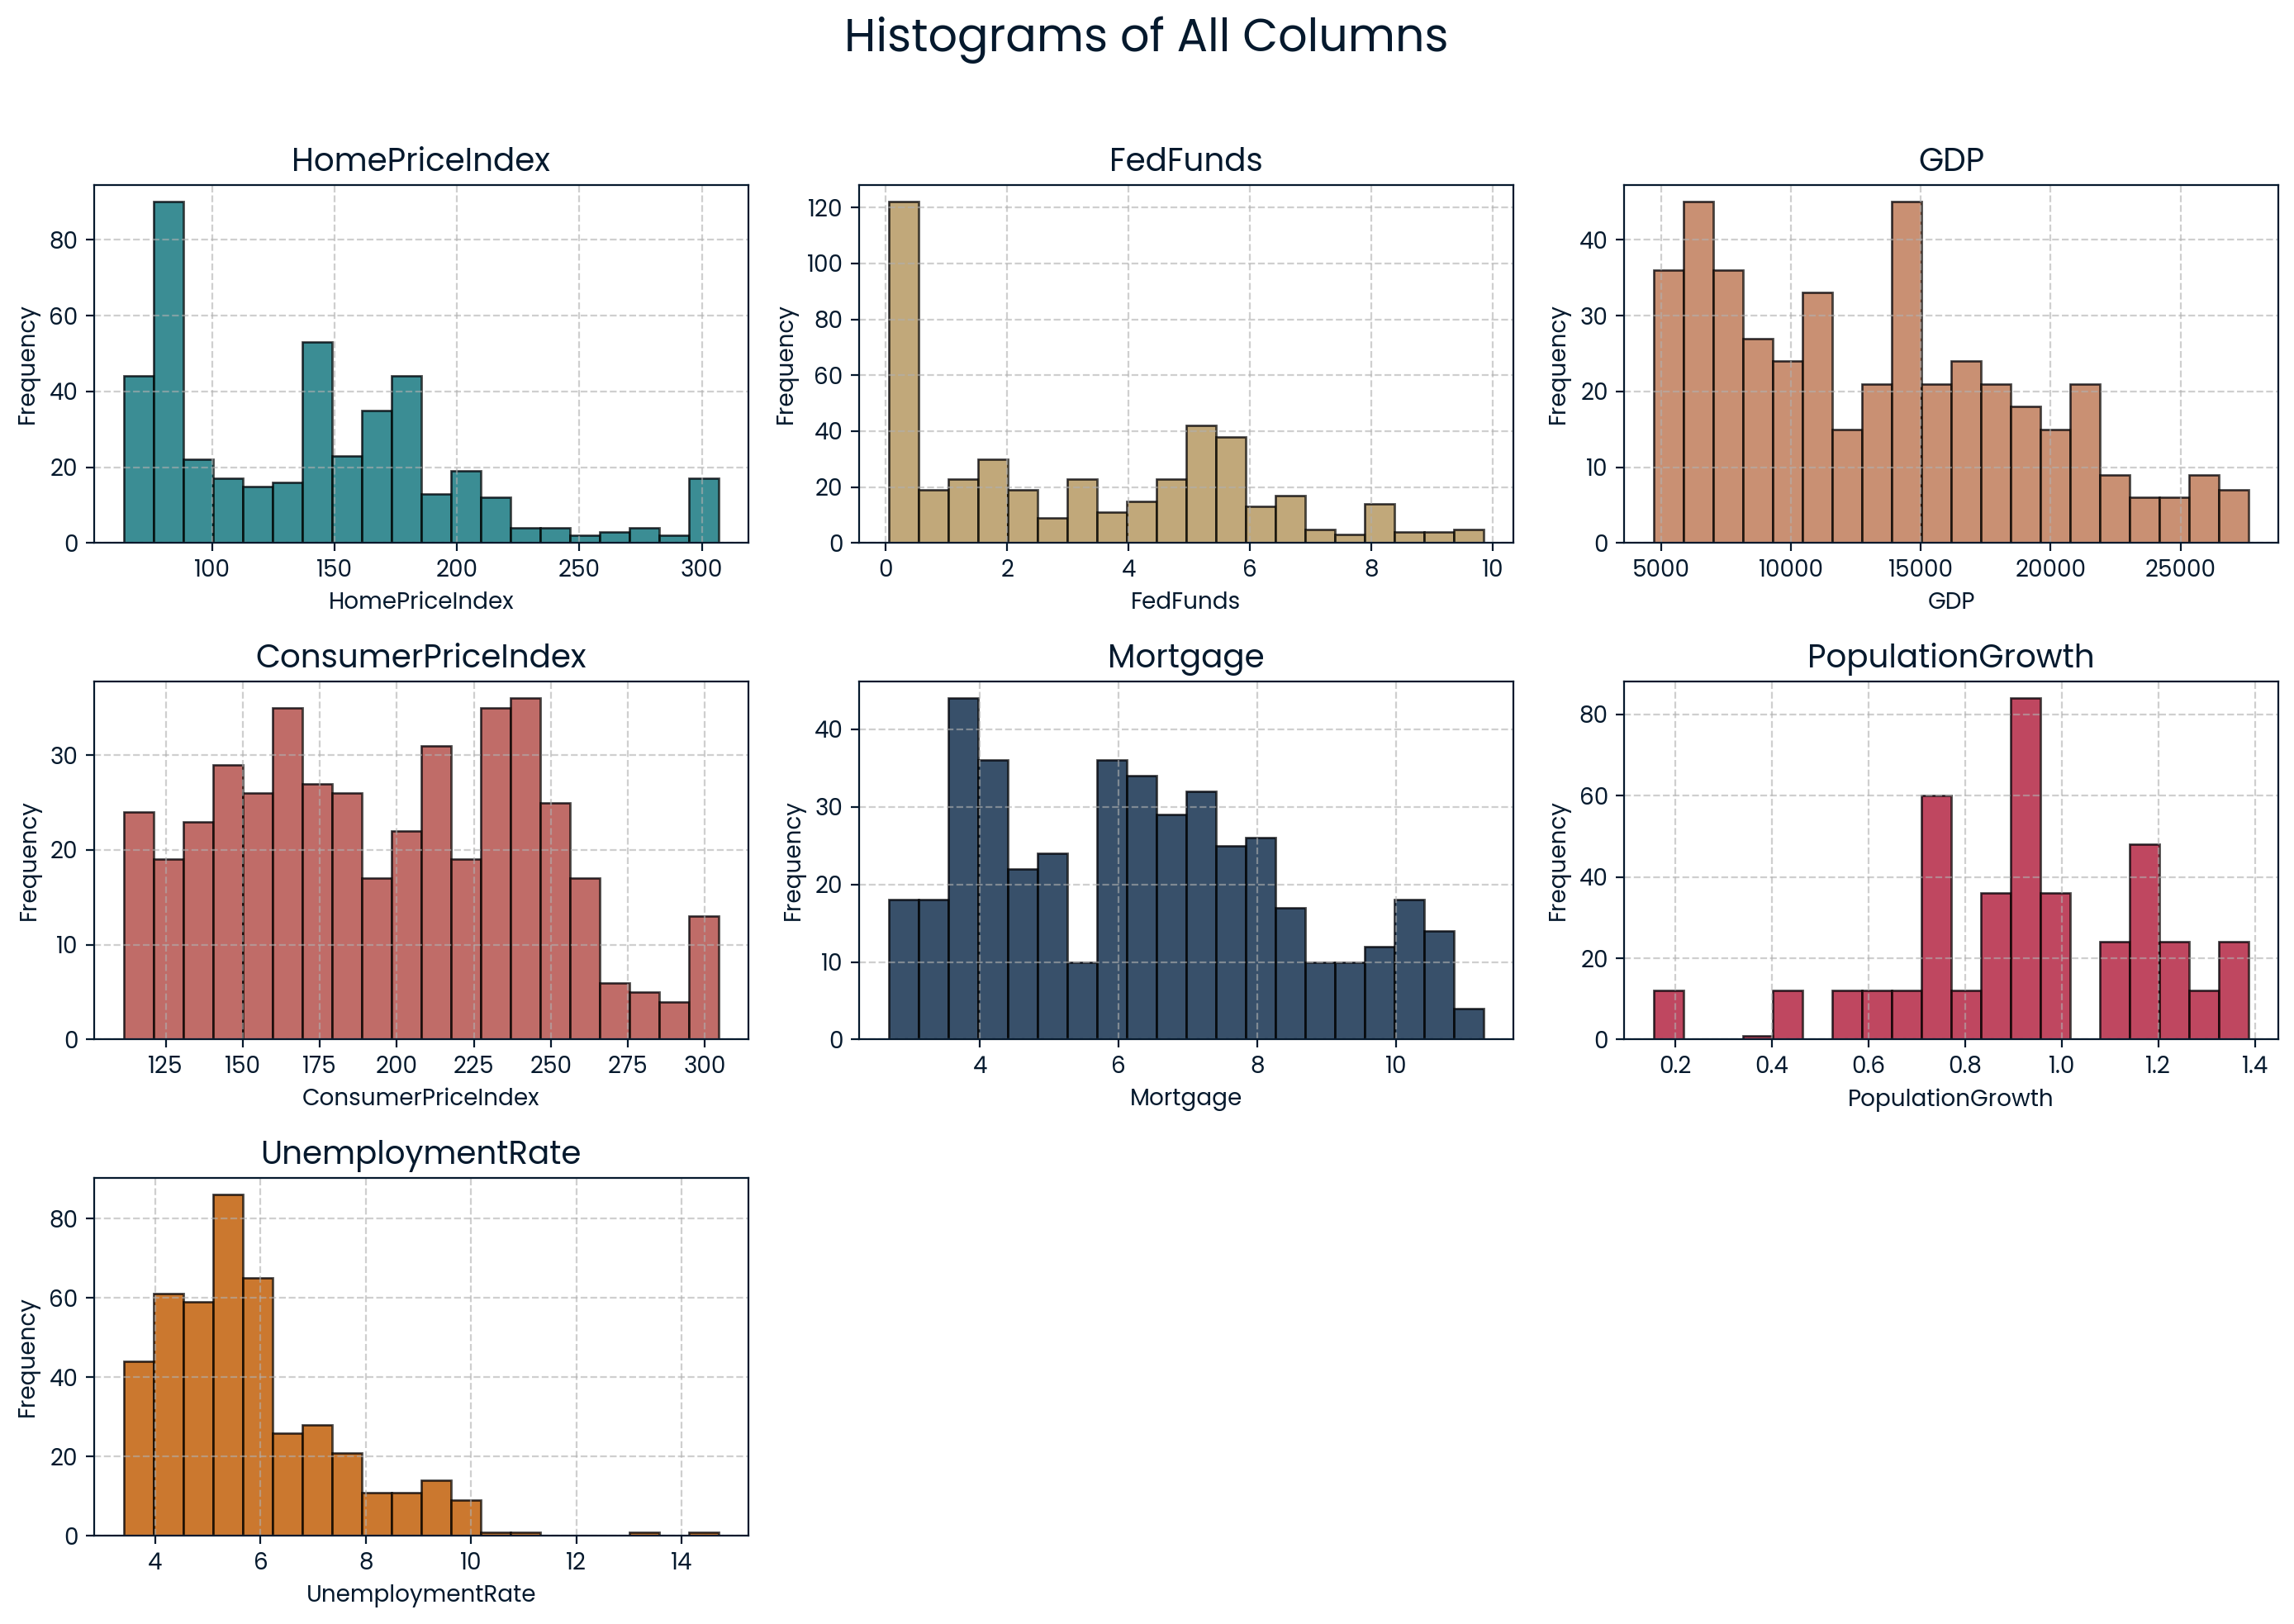

In [224]:
# Plot histograms for each column
df.hist(bins=20, figsize=(14, 10)) # Create histograms with 20 bins for each column, setting the figure size to 14 by 10 inches
plt.suptitle('Histograms of All Columns', fontsize=20) # Set the main title for the entire figure
# Define the columns to plot
columns = ['HomePriceIndex', 'FedFunds', 'GDP', 'ConsumerPriceIndex', 'Mortgage', 'PopulationGrowth', 'UnemploymentRate']
colors = ['#2A9D8F', '#E9C46A', '#F4A261', '#E76F51', '#264653', '#E63946', '#F77F00']
for i, (col, color) in enumerate(zip(columns, colors)):
    plt.subplot(3, 3, i+1)
    plt.hist(df[col].dropna(), bins=20, color=color, edgecolor='black', alpha=0.7)
    plt.title(col, fontsize=14)
    plt.xlabel(col)  # Add x-axis label
    plt.ylabel('Frequency')  # Add y-axis label
    plt.grid(True, linestyle='--', alpha=0.6)

# Adjust subplots to fit into the figure area
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show() 

## **Histogram Analysis**
From the previous histograms, there are three variables worth analysing:
### **Population Growth:** 
The data shows that the population usually grows around 0.9 per month.
### **Unemployment Rate:** 
The data shows that the unemployment rate is usually around 4%-6%.
### **Fed Funds:** 
According to the data, the most common rate is around 0%-0.25%.


In [204]:
# Create a copy of the merged dataframe to perform basic analysis 
new_df = df_merged.copy()
for column in new_df.columns:
    new_df[f'{column}_GrowthRate'] = new_df[column].pct_change() * 100
# Data augmentation: create a new column to smooth the mortgage graph
new_df["Mortgage_MA_3"] = new_df['Mortgage'].rolling(window=3).mean()
new_df.head(5)

,HomePriceIndex,FedFunds,GDP,ConsumerPriceIndex,Mortgage,PopulationGrowth,UnemploymentRate,HomePriceIndex_GrowthRate,FedFunds_GrowthRate,GDP_GrowthRate,ConsumerPriceIndex_GrowthRate,Mortgage_GrowthRate,PopulationGrowth_GrowthRate,UnemploymentRate_GrowthRate,Mortgage_MA_3
DATE,,,,,,,,,,,,,,,
1987-01-01,63.964,6.43,4722.156,111.4,9.3100,0.893829,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-02-01,64.424,6.10,4722.156,111.8,9.2040,0.893829,6.6,0.719155,-5.132193,0.000000,0.359066,-1.138561,0.0,0.000000,NaN
1987-03-01,64.736,6.13,4722.156,112.2,9.0825,0.893829,6.6,0.484292,0.491803,0.000000,0.357782,-1.320078,0.0,0.000000,9.198833
1987-04-01,65.132,6.37,4806.160,112.7,9.0350,0.893829,6.3,0.611715,3.915171,1.778933,0.445633,-0.522984,0.0,-4.545455,9.107167
1987-05-01,65.563,6.85,4806.160,113.0,9.8325,0.893829,6.3,0.661733,7.535322,0.000000,0.266193,8.826785,0.0,0.000000,9.316667


In [205]:
# Create a subplot grid with titles for each plot
fig = make_subplots(
    rows=4, cols=2,  # Define the grid size with 4 rows and 2 columns
    subplot_titles=(
        "Home Price Index", "Federal Funds Rate",  
        "GDP", "Unemployment Rates",
        "Consumer Price Index", "Population Growth",
        "Mortgage Rates", "Mortgage_MA_3" 
    )
)

# Column names and their positions in the subplot grid
column_positions = {
    'HomePriceIndex': (1, 1),
    'FedFunds': (1, 2),  
    'GDP': (2, 1),
    'UnemploymentRate': (2, 2),
    'ConsumerPriceIndex': (3, 1),
    'PopulationGrowth': (3, 2),
    'Mortgage': (4, 1),  
    'Mortgage_MA_3': (4, 2)
}

# Loop over the column_positions dictionary
for column, (row, col) in column_positions.items():
    fig.add_trace(
        go.Scatter(x=new_df.index, y=new_df[column], name=column),  # Create a scatter plot for each column
        row=row, col=col  # Specify the position in the subplot grid
    )

# Update layout
fig.update_layout(height=1000, width=1200, title_text="Economic Indicators Over Time", showlegend=True)  # Display the height, width, title & legend

# Show plot
fig.show()  # Render and display the plot



## **Time Series Analysis**
### **Home Price Index, GDP, Consumer Price Idnex**
The code shows the evolution of the different variables over time. At first sight, there is a clear positive relationship between the Home Price Index, GDP, and Consumer Price Index. Looking at the Home Price Index, we see an upward trend that shows the housing bubble in 2008-2009 with an increased slope for those years, followed by a drop that lasts until 2012. After that, it continues with its normal trend. We also see a small increase in the slope of these three variables after mid-year of 2020, probably showing the recovery after the first hit of COVID-19.

### **Unemployment Rate, Federal Funds Rate, Mortgage Rates**
Regarding the Unemployment Rate, we can see that there is certain cyclicality, which had a sharp increase in 2020 due to the pandemic. This global issue also made the Federal Funds Rate spike starting from that year in order to control inflation, and as the rest of the rates are related to Fed rates, the Mortgage Rates were also increased.

In [206]:
# Calculate the correlation matrix and round to two decimal places
corr_matrix = df.corr().round(2)  

# Plot the correlation heatmap with formatted values
fig_corr = px.imshow(corr_matrix, text_auto=True, title='Correlation Heatmap displaying Economic Indicators and Home Price Index')
fig_corr.update_layout(width=1000, height=1000)
fig_corr.show()    


In [207]:
# Correlation heatmap filtered by threshold

# Correlation Matrix
corr = df.corr()

# Filter cells that are outside our desired threshold
threshold = 0.6

# Apply the absolute of our threshold filter
filtered_corr = corr[corr.abs() > threshold]

# Plot the filtered correlation matrix
fig = px.imshow(filtered_corr, text_auto=".3f")

fig.update_layout(width=1000, height=1000)
fig.show()


## **Correlation Heatmap Analysis**
Establishing a strong correlation as over 0.6 or under -0.6, we can identify several values that are worth commenting on.

### **Home Price Index** 
It has a very strong correlation with GDP (0.96), meaning that 96% of the variables that explain the movements of this index also explain the movements of GDP. This makes sense as GDP is a way of measuring how well the economy of a country is doing, so the better it is, the higher the demand for housing.

The same effect happens with the Consumer Price Index (corr of 0.94), as the housing market represents around one third of the value of the market basket used to measure the CPI.

On the other hand, we see the opposite effect with Mortgage (corr of -0.74) and with Population Growth (corr of -0.79). Regarding Mortgage Rates, it makes sense because the higher the mortgage rates that people have to pay, the lower will be the demand for housing. Regarding the Population Growth, the data shows that as the population decreases, the Home Price Index increases.

### **Fed Funds**
Highly correlated with Mortgage Rates (corr of 0.9) due to the fact that Fed rates are the base for other rates. Also, higher Fed rates are used to decrease inflation, corroborating the negative correlation with the Consumer Price Index (corr of -0.73). Lastly, higher Fed rates increase the cost for the overall economy, negatively impacting GDP (corr of -0.69).

### **GDP** 
Similar to the Home Price Index, the correlation to the Consumer Price Index (corr of 0.99) means that a higher GDP implies a higher CPI. The opposite happens with the Mortgage Rates (corr of -0.85) and the Population Growth (corr of -0.82), meaning that the more costly the housing to people, the lower would be the GDP.

### **Consumer Price Index** 
As the housing market represents around one third of the market basket used to measure the CPI, higher costs (Mortgage corr of -0.88) will imply a lower demand in the housing market and thus, a lower CPI. The data also shows that the lower the Population Growth (corr of -0.78), the higher the CPI.

### **Mortgage** 
Strong correlation with Population Growth (corr of 0.7), meaning that if the population grows, rates should increase.

In [208]:
# Pairplot 
# Generate a scatter matrix with improved size and styling
fig = px.scatter_matrix(  
    df,                         # The DataFrame containing the data to be plotted
    dimensions=['HomePriceIndex', 'Mortgage', 'GDP', 'UnemploymentRate', 'ConsumerPriceIndex', 'PopulationGrowth', 'FedFunds'],
    title='Scatter Matrix of Housing Price Indicators',   # Set the title of the Scatter Matrix plot 
    labels={                                              # Custom labels for the axes
        'HomePriceIndex': 'Home Price Index',
        'Mortgage': 'Mortgage Rates',
        'GDP': 'GDP',
        'UnemploymentRate': 'Unemployment Rate',
        'ConsumerPriceIndex': 'CPI',
        'PopulationGrowth': 'Population Growth',
        'FedFunds': 'FED Funds Rate'
    }
)

# Update the layout for better visibility
fig.update_layout(width = 1500, height= 1500, dragmode='select', hovermode='closest')   
fig.show()                                    # Render and display the scatter matrix plot

## **Scatter Matrix Analysis**
This Scatter Matrix is just another way of representing the relationships between variables, producing the same insights as the correlation matrix. A clearer positive or negative pattern represents a higher correlation.

# Machine Learning - Random Forest Regressor

**Risk Management for Financial Institutions**

•	**Problem Statement:** Banks and mortgage companies face significant risks related to fluctuations in the housing market. Accurate predictions of market trends can mitigate risks associated with lending and mortgage underwriting.

•	**Objective:** Use regression modeling to anticipate future downturns or upswings in the housing market through `HomePriceIndex` , thereby informing risk assessment and management strategies in lending practices.


In [209]:
df_reg= df.copy()

## Feature Engineering

In [210]:
# Predicting the Home Price Index (HPI) using the current date's economic indicators indeed limits its forecasting capabilities, as these indicators would not be available in real time for making future predictions. A predictive model is most useful when it can operate on historical data to make future predictions, enabling proactive decision-making.
df_reg['FedFunds_lag1'] = df_reg['FedFunds'].shift(1)
df_reg['GDP_lag1'] = df_reg['GDP'].shift(1)
df_reg['ConsumerPriceIndex_lag1'] = df_reg['ConsumerPriceIndex'].shift(1)
df_reg['Mortgage_lag1'] = df_reg['Mortgage'].shift(1)
df_reg['PopulationGrowth_lag1'] = df_reg['PopulationGrowth'].shift(1)
df_reg['UnemploymentRate_lag1'] = df_reg['UnemploymentRate'].shift(1)

# drop any rows with NaN values that result from shifting
df_reg.dropna(inplace=True)

## Baseline Model

In [211]:
# Defining features and target
features_lagged = ['FedFunds_lag1', 'GDP_lag1', 'ConsumerPriceIndex_lag1', 'Mortgage_lag1', 'PopulationGrowth_lag1', 'UnemploymentRate_lag1']
X = df_reg[features_lagged]
y = df_reg['HomePriceIndex']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_reg.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2.493617719671358
R^2 Score: 0.9992142773066367


## Feature Slection

In [212]:
# Access the feature importances from the trained Random Forest model
feature_importances = rf_reg.feature_importances_

# Create a DataFrame to store feature names and their corresponding importances
importance_df = pd.DataFrame({
    'Feature': features_lagged,
    'Importance': feature_importances
})

# Sort the DataFrame by the 'Importance' column in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
fig = px.bar(importance_df, x='Importance', y='Feature', orientation='h', title='Feature Importances from Random Forest Regressor')

# Update layout with dynamic size
fig.update_layout(width=1000, height=600)
fig.update_yaxes(categoryorder='total ascending')  # Invert y-axis to have the most important feature on top

# Show plot
fig.show()

Most important feature is `GDP_lag1`, followed by `ConsumerPriceIndex_lag1` and `UnemploymentRate_lag1`.

## Optimized Model

In [213]:
# Keep only important features
# Defining features and target
features_lagged = ['GDP_lag1', 'ConsumerPriceIndex_lag1','UnemploymentRate_lag1']
X = df_reg[features_lagged]
y = df_reg['HomePriceIndex']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_reg.predict(X_test)

# Save the result
y_pred_rf_reg = y_pred
y_test_rf_reg = y_test

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1.0752509961475525
R^2 Score: 0.999661195418179


In [214]:
# Calculate the correlation coefficient
correlation_matrix = np.corrcoef(y_test_rf_reg, y_pred_rf_reg)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

# Create a DataFrame for Plotly
results_df = pd.DataFrame({
    'Actual': y_test_rf_reg,
    'Predicted': y_pred_rf_reg
})

# Create the scatter plot
fig = px.scatter(results_df, x='Actual', y='Predicted', opacity=0.5,
                 title='Random Forest Regressor Predictions vs. Actual',
                 labels={'Actual': 'Actual Home Price Index', 'Predicted': 'Predicted Home Price Index'})

# Add the line of perfect prediction
fig.add_trace(go.Scatter(x=[results_df['Actual'].min(), results_df['Actual'].max()],
                         y=[results_df['Actual'].min(), results_df['Actual'].max()],
                         mode='lines', line=dict(dash='dash', color='black'), name='Perfect Prediction'))

# Annotate the plot with the R² value
fig.add_annotation(x=0.05, y=0.95, xref='paper', yref='paper',
                   text=f'R² = {r_squared:.2f}', showarrow=False,
                   font=dict(size=12, color='black'),
                   bgcolor='white', bordercolor='black', borderwidth=1)

# Update layout with dynamic size
fig.update_layout(width=1000, height=600, grid=dict(rows=1, columns=1), showlegend=False)

# Show plot
fig.show()


The R^2 = 1.00 suggests a perfect fit, suggesting that the model perfectly predicts the real values. The dots (predictions) over the dashed diagonal line (place where perfect predictions would be) visually states this accuracy.

# Machine Learning -  Radom Forest Classifier

**Problem Statements:** Real estate investors and homeowners need to make timely decisions about buying or selling properties based on expected changes in market prices. 

**Objective:** Predicting whether to buy or sell `Buy_Sell` based on economic indicators `HomePriceIndex` can enhance decision-making and optimize financial outcomes.

In [215]:
df_clf = df.copy()

## Feature Engineering

In [216]:
# Predicting the Home Price Index (HPI) using the current date's economic indicators indeed limits its forecasting capabilities, as these indicators would not be available in real time for making future predictions. A predictive model is most useful when it can operate on historical data to make future predictions, enabling proactive decision-making.
df_clf['FedFunds_lag1'] = df_clf['FedFunds'].shift(1)
df_clf['GDP_lag1'] = df_clf['GDP'].shift(1)
df_clf['ConsumerPriceIndex_lag1'] = df_clf['ConsumerPriceIndex'].shift(1)
df_clf['Mortgage_lag1'] = df_clf['Mortgage'].shift(1)
df_clf['PopulationGrowth_lag1'] = df_clf['PopulationGrowth'].shift(1)
df_clf['UnemploymentRate_lag1'] = df_clf['UnemploymentRate'].shift(1)

# Drop any rows with NaN values that result from shifting
df_clf.dropna(inplace=True)

In [217]:
# Add another column for percent change of HPI over time
df_clf['HomePriceIndex_change'] = df_clf['HomePriceIndex'].pct_change()
# Add categorical column 'Buy_Sell' - hold if change is 0, sell if <0, buy if >0
df_clf['Buy_Sell'] = df_clf['HomePriceIndex_change'].apply(lambda x: "Buy" if x > 0 else ("Hold" if x == 0 else "Sell"))

# Drop first row with NaNs
df_clf.dropna(inplace=True)

In [218]:
# Plot Distribution of Buy_Sell column
buy_sell_counts = df_clf['Buy_Sell'].value_counts()

# Plot Distribution of Buy_Sell column
buy_sell_counts = df_clf['Buy_Sell'].value_counts().reset_index()
buy_sell_counts.columns = ['Buy_Sell', 'Count']

# Creating the histogram
fig = px.bar(buy_sell_counts, x='Buy_Sell', y='Count', title='Histogram of Buy/Sell Decisions', text='Count')

# Update layout with dynamic size
fig.update_layout(width=800, height=600)

# Show plot
fig.show()

Over 80% of the decisions ended up being `Buy`.

## Baseline Model

In [219]:
# Defining features and target
features_lagged = ['FedFunds_lag1', 'GDP_lag1', 'ConsumerPriceIndex_lag1', 'Mortgage_lag1', 'PopulationGrowth_lag1', 'UnemploymentRate_lag1']
X = df_clf[features_lagged]
y = df_clf['Buy_Sell'] 

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the RandomForest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_clf.predict(X_test)

# Save the results
y_pred_rf_clf = y_pred
y_test_rf_clf = y_test

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('\n Confusion Matrix:\n')
print(conf_matrix)
print('\n Classification Report:\n')
print(report)

Accuracy: 0.9285714285714286

 Confusion Matrix:

[[63  3]
 [ 3 15]]

 Classification Report:

              precision    recall  f1-score   support

         Buy       0.95      0.95      0.95        66
        Sell       0.83      0.83      0.83        18

    accuracy                           0.93        84
   macro avg       0.89      0.89      0.89        84
weighted avg       0.93      0.93      0.93        84



The report shows that the model predicts the otucomes `Buy` and `Sell` correctly around 92.8% of the times, showing that the model is very accurate. Also, the F-1 socre for both `Buy` and `Sell` are high, corroborating the high precision of the model.

## Feature Selection

In [221]:
# Dynamic feature importances 

# Access the feature importances from the trained RandomForest model
feature_importances = rf_clf.feature_importances_

# Create a DataFrame to store feature names and their corresponding importances
importance_df = pd.DataFrame({
    'Feature': features_lagged,
    'Importance': feature_importances
})

# Sort the DataFrame by the 'Importance' column in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances using Plotly Express
fig = px.bar(importance_df, x='Importance', y='Feature', orientation='h', 
             title='Feature Importances from Random Forest Classifier',
             labels={'Feature': 'Feature', 'Importance': 'Importance'})

# Update layout with dynamic size
fig.update_layout(width=1000, height=600)
fig.update_yaxes(categoryorder='total ascending')

# Show plot
fig.show()


Most important feature is `PopulationGrowth_lag1`, followed by `UnemploymentRate_lag1` and `ConsumerPriceIndex_lag1`.

## Optimized Model

In [222]:
# Defining features and target
features_lagged = ['GDP_lag1', 'ConsumerPriceIndex_lag1', 'UnemploymentRate_lag1']
X = df_clf[features_lagged]
y = df_clf['Buy_Sell'] 

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the RandomForest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_clf.predict(X_test)

# Save the results
y_pred_rf_clf = y_pred
y_test_rf_clf = y_test

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(report)

Accuracy: 0.9285714285714286
Confusion Matrix:
[[63  3]
 [ 3 15]]
Classification Report:
              precision    recall  f1-score   support

         Buy       0.95      0.95      0.95        66
        Sell       0.83      0.83      0.83        18

    accuracy                           0.93        84
   macro avg       0.89      0.89      0.89        84
weighted avg       0.93      0.93      0.93        84



### Model
The accuracy of the Optimized Model is also around 92.8% when using just the 3 most important variables, meaning that using less variables maintains the ability of the model to correctly predict when to `Buy` and when to `Sell`.

### Limitations
It is important to note that this model has some limitations. Firstly, the amount of data used is relatively small, with fewer than 1,000 observations. This limited dataset can affect the model's ability to generalize well to new data. Additionally, the way the model is fed may contribute to these limitations. The dataset is unbalanced, with a significantly higher number of `Buy` instances (344) compared to `Sell` instances (75). This imbalance can skew the model's accuracy, making it more likely to predict 'Buy' over 'Sell' and potentially affecting the overall performance and reliability of the predictions.

# Conclusion
The analysis conducted on the dataset showed in the first instance a high correlation between the `Home Price Index` and most of the other variables that affect this index, like the `GDP`, `Consumer Price Index`, `Mortgage Rates`, and `Population Growth`. This means that most of the factors that affect these variables also affect the `Home Price Index`. This information is very useful to stakeholders that track this index, as it means that they need to be highly aware of their movements in order to understand the behavior of it.

Furthermore, these variables also facilitated the development of highly accurate models to predict the index behavior. The results generated a high fit between the predicted data and the real one, which can help agents predict the `Home Price Index` for the following month and help them make decisions in the moment (`Buy_Sell`). This aligns with the objective of the analysis, as the results mean that stakeholders could benefit from these models by improving their management skills and decision-making process in order to achieve better financial results.

# References
* Sentis Ariza, S. (2024). AI in Finance: Data-Driven Investment Strategies with Python, session 1. Hult International Business School.
* Sentis Ariza, S. (2024). AI in Finance: Data-Driven Investment Strategies with Python, session 2. Hult International Business School.
* Sentis Ariza, S. (2024). AI in Finance: Data-Driven Investment Strategies with Python, session 3. Hult International Business School.
* Sentis Ariza, S. (2024). AI in Finance: Data-Driven Investment Strategies with Python, session 4. Hult International Business School.
* Sentis Ariza, S. (2024). AI in Finance: Data-Driven Investment Strategies with Python, session 5. Hult International Business School.
* Sentis Ariza, S. (2024). AI in Finance: Data-Driven Investment Strategies with Python, session 6. Hult International Business School.
* Sentis Ariza, S. (2024). AI in Finance: Data-Driven Investment Strategies with Python, session 7. Hult International Business School.
* OpenAI. (n.d.). ChatGPT-4 [AI model]. Retrieved July 2024, from https://chat.openai.com/chat
* How does the Consumer Price Index account for the cost of housing? (2024, January 31). Brookings. https://www.brookings.edu/articles/how-does-the-consumer-price-index-account-for-the-cost-of-housing/#:~:text=Housing%20represents%20about%20one%2Dthird
* Pant, M. (2024). Factors Affecting USA National Home Prices Dataset. Kaggle.com. https://www.kaggle.com/datasets/madhurpant/factors-affecting-usa-national-home-prices?select=Mortgage.csv
* Liberto, D. (2022, January 27). House Price Index (HPI) Definition. Investopedia. https://www.investopedia.com/terms/h/house-price-index-hpi.asp

‌